![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import division
from numpy import *
from pylab import *
from numpy.random import rand
import scipy.stats

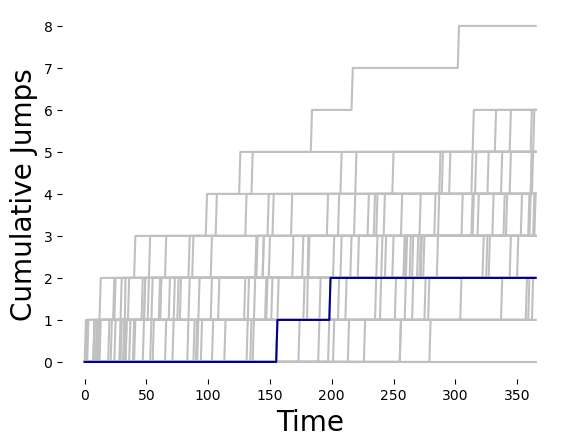

In [20]:
# This is an algorithm to generate Poisson distributed random variables
def Poisson(M,theta):
#M is the number of simulations
#Theta is the mean number of jumps

    N = zeros(M)

    for i in xrange(0,M):
        p = exp(-theta)                     #This is probability of N = 0. It is basically replacing N=0 in the formula for Poisson distribution
        F = p                               #Make the cumulative probability equal to p(N=0).
        N[i] = 0
        U = rand()
        while U > F:    
            N[i] = N[i]+1
            p = p*theta/N[i]
            F= F+p

    return N


#################################################################################
#This function is from scipy with the inverse distribution
def Poisson_scipy(M,N,theta):
    N = scipy.stats.distributions.poisson.ppf(rand(M,N),theta)
    return N

M = 100
d = 365
theta = 0.01

JUMPS_vector = Poisson_scipy(M,d,theta)        #100 paths, 365 days, 0.01 jumps per day on average

#To acumulate the jumps
JUMPS_vector_cum = zeros((M,d+1))

#Calculate the paths
for i in range(0,M):
    for j in range(0,d):
        JUMPS_vector_cum[i,j+1] = JUMPS_vector_cum[i,j]+JUMPS_vector[i,j]

#Plot the paths        
plt.plot(JUMPS_vector_cum[0:50,:].transpose(),c='silver')
plt.plot(JUMPS_vector_cum[0:1,:].transpose(),c='darkblue')
ylabel("Cumulative Jumps",fontsize=20)
xlabel("Time",fontsize=20)
box(on=None)

show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)